# Gap Minder EDA

## Introduction

In this notebook, you will explore the [Gapminder](https://www.gapminder.org/) dataset. This dataset became popular in a series of TED talks by [Hans Rosling](https://www.ted.com/speakers/hans_rosling). For this notebook we will use the cleaned version of this dataset provided by Jenny Bryan [here](https://github.com/jennybc/gapminder).

## Imports

In [1]:
import pandas as pd
import altair as alt
alt.enable_mime_rendering()

Load the cleaned dataset:

In [2]:
data = pd.read_csv('/data/gapminder/gapminder.tsv', sep='\t')

In [3]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Life expectancy over time

Create an `alt.Chart` with Altair to explore life expectancy over time:

* Use a line mark.
* Encode `year` as the x position with a `timeUnit` of `year`.
* Encode the `mean` of `lifeExp` as the y position.
* Encode `continent` as the color with a nominal datatype.

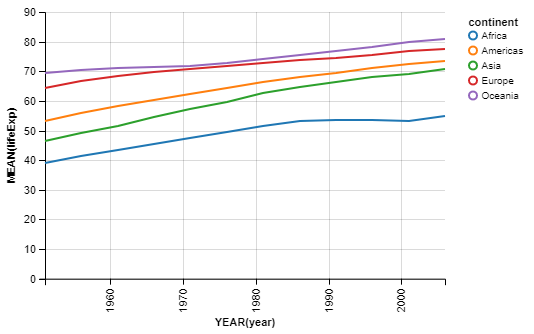

In [4]:
# YOUR CODE HERE
alt.Chart(data).mark_line().encode(
    alt.X("year:T", timeUnit = "year"),
    alt.Y("mean(lifeExp):Q"),
    alt.Color("continent:N")
)

## Filter years

Show the unique values in the `year` column:

In [5]:
data['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

Create a new `DataFrame` named `first_last` containing only the rows with the first or last years:

In [6]:
first_last = data.loc[(data["year"] == 1952) | (data["year"] == 2007)]

In [7]:
first_last.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
12,Albania,Europe,1952,55.230,1282697,1601.056136
23,Albania,Europe,2007,76.423,3600523,5937.029526
24,Algeria,Africa,1952,43.077,9279525,2449.008185


In [8]:
assert len(first_last)==284

## Tick chart of life expectancy by continent

Create an `alt.Chart` with Altair to explore the distribution of life expectancy, grouped by continent:

* Use the filtered dataset `first_last`.
* Use a tick mark.
* Encode `lifeExp` as the x position.
* Encode `continent` as the y position with a nominal datatype.
* Encode `year` as the color with a nominal datatype.

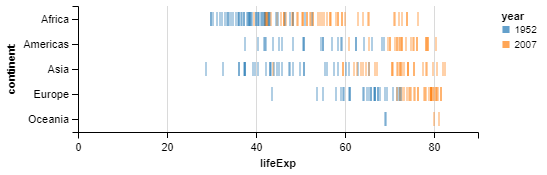

In [9]:
# YOUR CODE HERE
alt.Chart(first_last).mark_tick().encode(
    alt.X("lifeExp:Q"),
    alt.Y("continent:N"), 
    alt.Color("year:N")
)

## Income and life expectancy

Create an `alt.Chart` with Altair to explore the distribution of life expectancy, grouped by continent:

* Use the filtered dataset `first_last`.
* Use a circle mark.
* Encode `gdpPercap` as the x position. Add a custom log scale, with a domain of `[100,100000]`.
* Encode `lifeExp` as the y position. Add a custom scale with a domain of `[30,90]` and `zero=False`.
* Encode `pop` as the size.
* Encode `continent` as the color with a nominal datatype.
* Encode `year` as the row.
* Set human readable titles for the axes and legends in title case.

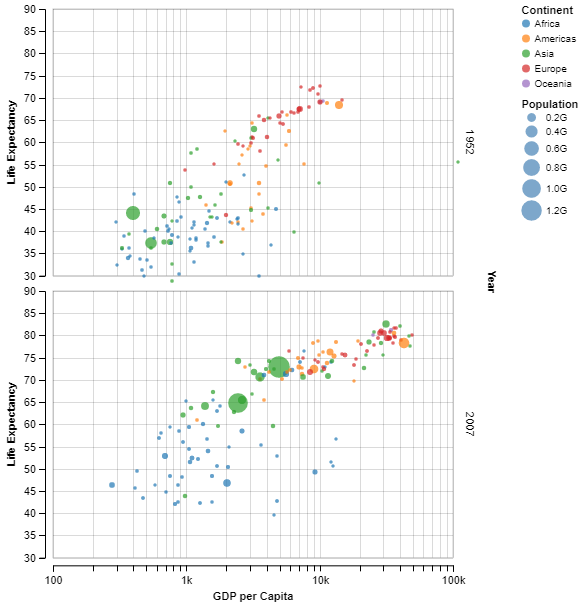

In [10]:
# YOUR CODE HERE
alt.Chart(first_last).mark_circle().encode(
    alt.X("gdpPercap", scale = alt.Scale(type = "log", domain = [100,100000]), title = "GDP per Capita"),
    alt.Y("lifeExp", scale = alt.Scale(domain = [30,90], zero = False), title = "Life Expectancy"),
    alt.Size("pop", title = "Population"),
    alt.Color("continent:N", title = "Continent"),
    alt.Row("year", title = "Year")
)